In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [220]:
# <<global status>>
nothing = 0

soil = 'soil'
soil_representation = -1  #  配列内での表現値

trunk                      = 'trunk'
trunk_representation       = 1             #  配列内での表現値
trunk_LifeSpam             = float('inf')  #  寿命
trunk_MentalStressCapacity = float('inf')  #  メンタルストレス容量
trunk_GrowthRate           = 1#0.5           #  成長率

leaf                         = 'leaf'
leaf_representation          = 2      #  配列内での表現値
leaf_LifeSpam                = 500    #  寿命
leaf_MentalStressCapacity    = 30     #  メンタルストレス容量
leaf_LightStressAccThreshold = 10     #  光由来のメンタルストレス受容閾値
leaf_GrowthRate              = 1#0.3    #  成長率

class Cell:
    global trunk, trunk_LifeSpam, trunk_MentalStressCapacity
    global leaf, leaf_LifeSpam, leaf_MentalStressCapacity, leaf_LightStressAccThreshold
    def __init__(self):
        # <<own status>>
        self.name         = None  # trunk / leaf
        self.coordination = None  # [[x, y, (z)]]
        self.size_status  = None  # [width, height, (depth), weight]
        self.survival     = True  # True(live) / False(dead)
        self.age          = 0
        self.mentalStress = 0
        self.around_data  = None
        #self.physicalStress = 0
        
        # <<environmental　status>>
        self.lightness = 100
    
    def __del__(self):
        pass
    
    # 配列の更新用
    def paint(self, field_array):
        if self.name == trunk:
            x, y = self.coordination[0]  #  <-- fixme
            field_array[y, x] = 1
        elif self.name == leaf:
            for cd in self.coordination:
                x, y = cd
                field_array[y, x] = 2
        return field_array
    
    # 成長用
    def growth(self, cells_list, field_array):
        if self.name == trunk:
            if self.age > 50:
                if np.random.rand() <= trunk_GrowthRate:
                    new_trunk = Cell()
                    new_trunk.name = trunk
                    x, y = self.coordination[0]
                    # 70%で上方向へ成長
                    if np.random.rand() <= 0.7:
                        #上が0
                        if self.around_data[0][1] == nothing:
                            new_trunk.coordination = np.array([[x, y+1]])
                    else:
                        #左が0
                        if self.around_data[1][0] == nothing:
                            new_trunk.coordination = np.array([[x-1, y]])
                        #右が0
                        if self.around_data[1][2] == nothing:
                            new_trunk.coordination = np.array([[x+1, y]])
                    cells_list.append(new_trunk)
        elif self.name == leaf:
            if self.age > 10:
                if np.random.rand() <= leaf_GrowthRate:
                    new_leaf = Cell()
                    new_leaf.name = leaf
                    x, y = self.coordination[:,-1], self.coordination[:,0][0]  #  <-- fixme
                    xL, xR = x
                    arL, arR = self.around_data[1][0], self.around_data[1][-1]  #  <-- fixme
                    if arL == nothing:
                        new_leaf.coordination = np.array([[xL-2, y]])
                    if arR == nothing:
                        new_leaf.coordination = np.array([[xR+2, y]])
                    cells_list.append(new_leaf)
    
    # 周囲の状況把握用
    def look_around(self, field_array):
        if self.name == trunk:
            x, y = self.coordination[0]  #  <-- fixme
            xL = xR = x
        elif self.name == leaf:
            x, y = self.coordination[:,-1], self.coordination[:,0][0]  #  <-- fixme
            xL, xR = x
            
        upper  = field_array[y-1,:][xL-1:xR+2]
        center = field_array[y,  :][xL-1:xR+2]
        lower  = field_array[y+1,:][xL-1:xR+2]
        
        self.around_data = np.array([upper, center, lower])
        
    # 日照把握用
    def sunlight(self, field_array):
        pass
    
    # ペナルティ部の更新用
    def destruction(self):
        if self.name == trunk:
            # 寿命
            if self.age > trunk_LifeSpam:
                self.survival = False
            # 空中浮遊対策
            #if np.sum(self.around_data) <= np.prod(self.size_status[0:2])*trunk_representation:
            #    self.survival = False
            # メンタルストレス死
            if self.mentalStress > trunk_MentalStressCapacity:
                self.survival = False
        elif self.name == leaf:
            # 寿命
            if self.age > leaf_LifeSpam:
                self.survival = False
            # 空中浮遊対策
            #if np.sum(self.around_data) <= np.prod(self.size_status[0:2])*leaf_representation:
            #    self.survival = False
            # メンタルストレス死
            if self.mentalStress > leaf_MentalStressCapacity:
                self.survival = False
            # 日照不足によるメンタルストレス増加
            if self.lightness < leaf_LightStressAccThreshold:
                self.mentalStress += 1
    
    def update(self, cells_list, field_array):
        self.age += 1
        self.look_around(field_array)
        self.destruction()
        self.growth(cells_list, field_array)
        field_array = self.paint(field_array)
        return field_array

In [221]:
## basic init
cells_list = []

## field init
field_size = 100
gnd_depth = 5
field_array = np.zeros((field_size, field_size))
field_array[-gnd_depth:,:] += soil_representation

## plant seed
seed = Cell()
seed.name = trunk
seed.coordination = np.array([[int(field_size/2), int(field_size-gnd_depth-1)]])
seed.basic_status = [1,1,None,1]
cells_list.append(seed)

50 94


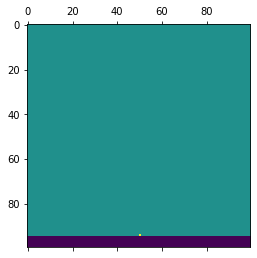

In [222]:
x, y = seed.coordination[0]
print(x, y)
field_array[y,x] = 1
plt.matshow(field_array)

In [ ]:
while True:
    for cell in cells_list:
        if cell.coordination is None:
            continue
        field_array = cell.update(cells_list, field_array)
        #plt.matshow(field_array)
    print("\r"+str(seed.age), end='')
    if seed.age == 1000:
        break

375

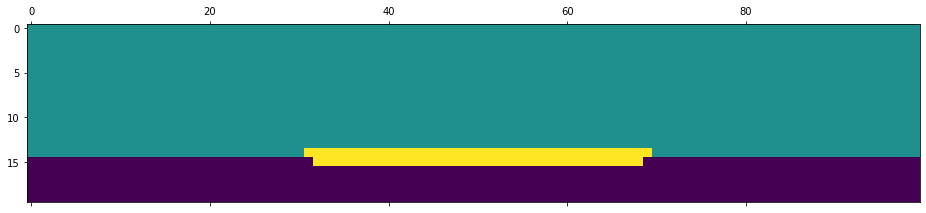

In [219]:
plt.matshow(field_array[80:,:])

# TEST FIELD

In [18]:
a = np.array([[0,0,0,0,0,0,0],
              [0,2,2,1,0,0,0],
              [0,0,0,1,0,0,0],
              [0,2,2,1,2,2,0],
              [0,0,0,1,0,0,0],
              [0,0,0,1,0,0,0],
              [-1,-1,-1,-1,-1,-1,-1] ])

coord = [[3,1],[3,2]]
row, col = 3, 1
now = a[row][col]
print("now : ",now)
print(a)

now :  2
[[ 0  0  0  0  0  0  0]
 [ 0  2  2  1  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  2  2  1  2  2  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0]
 [-1 -1 -1 -1 -1 -1 -1]]


In [19]:
a[row,:]

array([0, 2, 2, 1, 2, 2, 0])

In [20]:
left, right = a[row,:][0:col], a[row,:][col:-1]
upper, lower = a[:,col][0:row], a[:,col][row:-1]
print(left, right)
print(upper, lower)

[0] [2 2 1 2 2]
[0 2 0] [2 0 0]


In [23]:
x,y=3,3
upper = a[x-1,:][x-1:x+2]
center = a[x,:][x-1:x+2]
lower = a[x+1,:][x-1:x+2]
around = np.array([upper, center, lower])
around[0]

array([0, 1, 0])

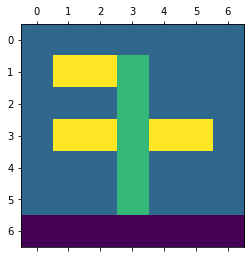

In [10]:
plt.matshow(a)

In [29]:
n=np.array([[1,0,0,0],
            [1,2,2,0],
            [1,1,0,0]])

In [34]:
np.sum(n)

8